In [46]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [47]:
nfl = pd.read_csv("season_2021_nfl.csv")
nfl.head()

,team_name,week,day,date,result,opponent,tm_score,opp_score,1stD_offense,TotYd_offense,PassY_offense,RushY_offense,TO_offense,1stD_defense,TotYd_defense,PassY_defense,RushY_defense,TO_defense
0,Arizona Cardinals,1,Sun,September 12,W,Tennessee Titans,38,13,22,416,280,136,1,17,248,162,86,3
1,Arizona Cardinals,2,Sun,September 19,W,Minnesota Vikings,34,33,21,474,371,103,2,22,419,242,177,0
2,Arizona Cardinals,3,Sun,September 26,W,Jacksonville Jaguars,31,19,23,407,316,91,1,20,361,202,159,4
3,Arizona Cardinals,4,Sun,October 3,W,Los Angeles Rams,37,20,27,465,249,216,0,24,401,280,121,2
4,Arizona Cardinals,5,Sun,October 10,W,San Francisco 49ers,17,10,20,304,210,94,1,19,338,186,152,1


In [48]:
nfl.result.value_counts()

W    284
L    284
T      2
Name: result, dtype: int64

In [49]:
result_encoder = {"result": {"W":1, "T": 0, "L":0}}

nfl.replace(result_encoder, inplace=True)

nfl.result.value_counts()

0    286
1    284
Name: result, dtype: int64

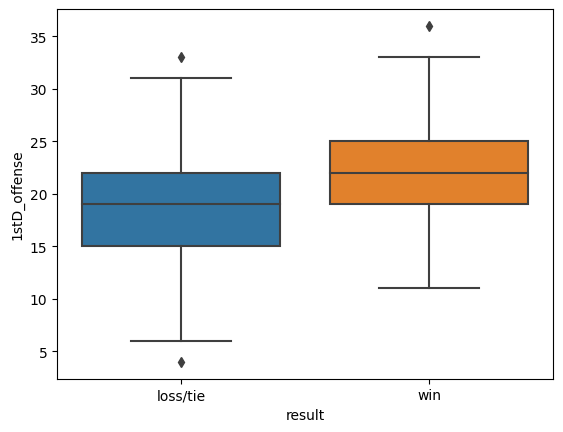

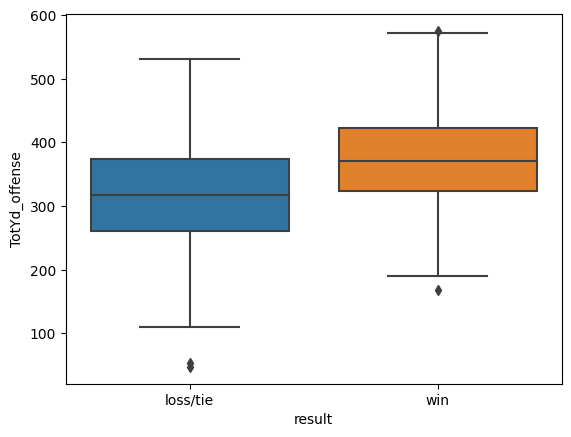

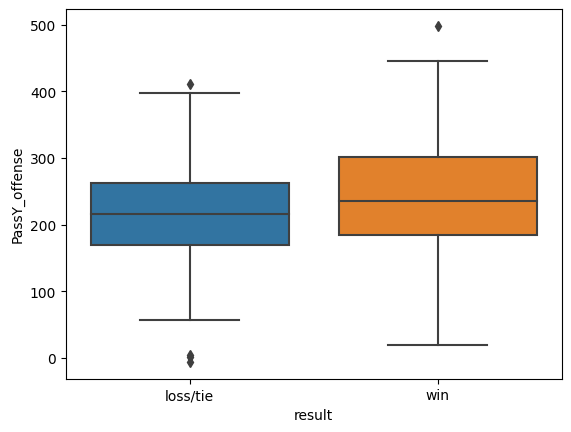

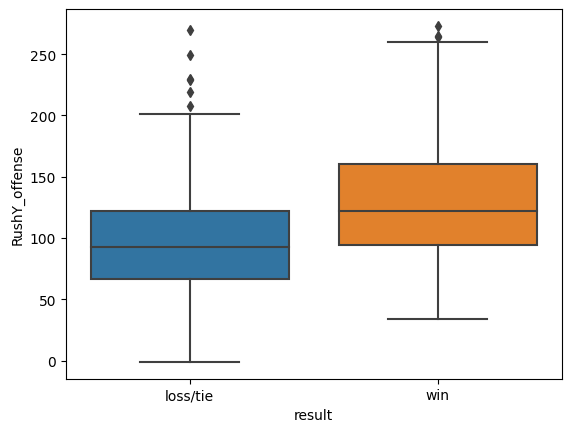

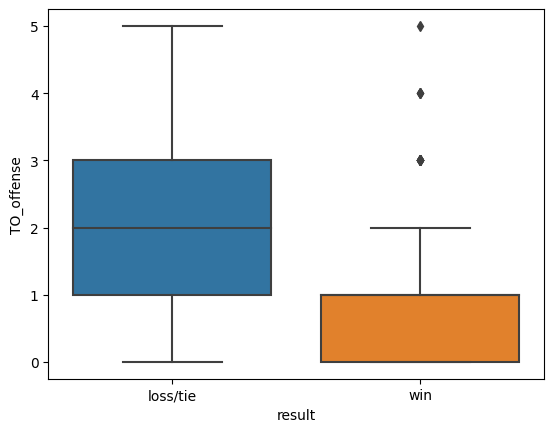

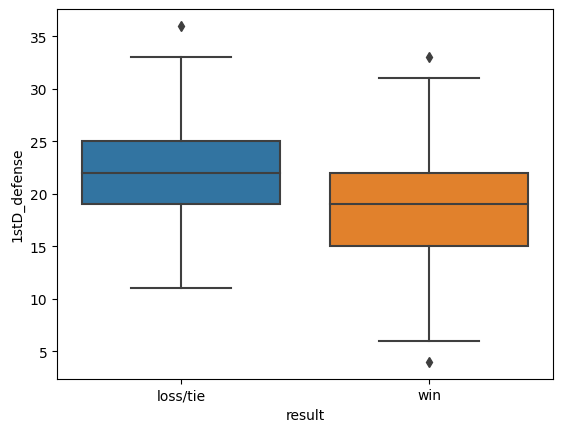

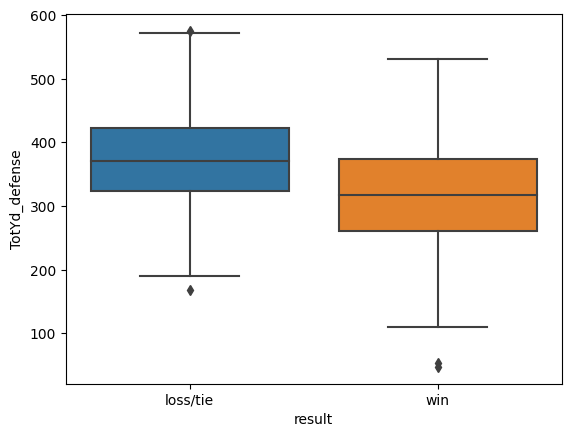

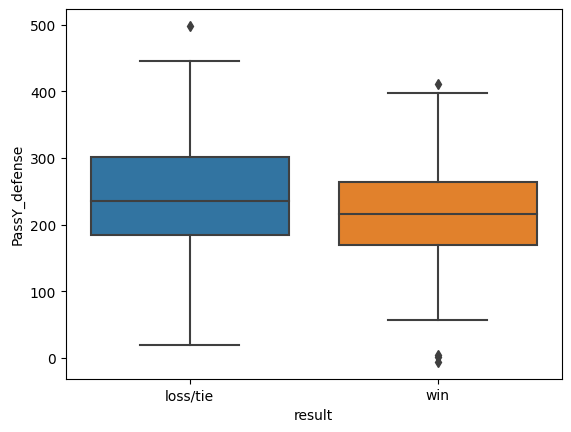

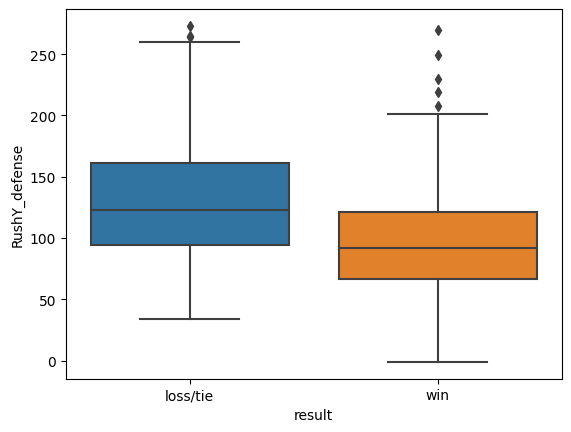

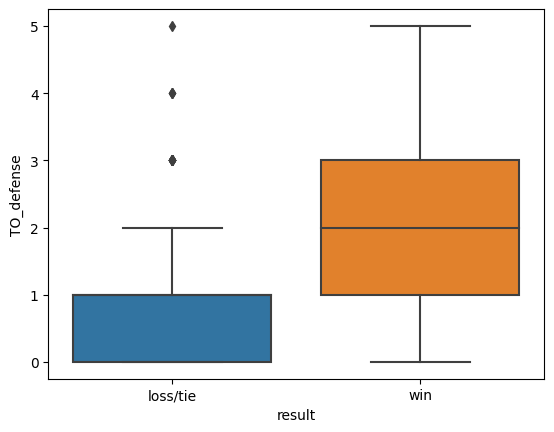

In [50]:
for column in list(nfl.columns)[8:]:
    stat_plot = sns.boxplot(x="result", y=column, data=nfl)
    stat_plot.set_xticklabels(["loss/tie", "win"])
    plt.show()

In [51]:
features = nfl.iloc[:,8:]
scaler = StandardScaler()

scaler.fit(features)

x = scaler.transform(features)
print(x)

[[ 0.33577642  0.85032803  0.65030533 ... -0.86458875 -0.57905888
   1.43177189]
 [ 0.13785237  1.53348344  1.81857111 ...  0.16245809  1.27237329
  -1.08968015]
 [ 0.53370047  0.74432116  1.11247641 ... -0.35106533  0.90615594
   2.27225591]
 ...
 [-1.247616   -1.02246005 -0.73620789 ...  2.04965665 -0.13145989
  -1.08968015]
 [ 0.73162452 -0.37464027 -0.14565596 ... -0.22268447  0.07199419
  -1.08968015]
 [-0.85176789 -0.22151923 -1.67338813 ... -1.8787975  -0.41629561
   1.43177189]]


In [52]:
y = nfl.result
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
565    0
566    0
567    0
568    0
569    1
Name: result, Length: 570, dtype: int64


In [53]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.25, random_state=1)

In [54]:
lrc = LogisticRegression(max_iter=3000)

lrc.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [55]:
y_pred = lrc.predict(X_test)
accuracy_score(y_pred, y_test)

0.7762237762237763

In [56]:
penalties = ["l1", "l2"]
C = [0.01, 0.1, 1.0, 10.0, 1000.0]

for penalty in penalties:
    for c in C:
        lrc_tuned = LogisticRegression(penalty=penalty, C=c, solver="liblinear")
        lrc_tuned.fit(X_train, y_train)
        y_pred = lrc_tuned.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_rounded = round(accuracy*100, 1)

        print(f"Accuracy: {accuracy_rounded}%, Penalty: {penalty} and C={c}")

Accuracy: 70.6%, Penalty: l1 and C=0.01
Accuracy: 77.6%, Penalty: l1 and C=0.1
Accuracy: 77.6%, Penalty: l1 and C=1.0
Accuracy: 77.6%, Penalty: l1 and C=10.0
Accuracy: 77.6%, Penalty: l1 and C=1000.0
Accuracy: 76.2%, Penalty: l2 and C=0.01
Accuracy: 77.6%, Penalty: l2 and C=0.1
Accuracy: 76.9%, Penalty: l2 and C=1.0
Accuracy: 77.6%, Penalty: l2 and C=10.0
Accuracy: 77.6%, Penalty: l2 and C=1000.0


In [57]:
penalty = "l1"
C = 0.1

test_sizes = [val/100 for val in range(20,35)]

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=test_size, random_state=42)
    lrc_ts = LogisticRegression(penalty=penalty, C=c, solver="liblinear")
    lrc_ts.fit(X_train, y_train)
    y_pred = lrc_ts.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_rounded = round(accuracy*100, 1)
    print(f"Accuracy: {accuracy_rounded}% and test_size={test_size}")


Accuracy: 87.7% and test_size=0.2
Accuracy: 88.3% and test_size=0.21
Accuracy: 87.3% and test_size=0.22
Accuracy: 87.9% and test_size=0.23
Accuracy: 88.3% and test_size=0.24
Accuracy: 88.1% and test_size=0.25
Accuracy: 87.9% and test_size=0.26
Accuracy: 87.7% and test_size=0.27
Accuracy: 88.1% and test_size=0.28
Accuracy: 88.6% and test_size=0.29
Accuracy: 87.1% and test_size=0.3
Accuracy: 87.0% and test_size=0.31
Accuracy: 86.9% and test_size=0.32
Accuracy: 87.3% and test_size=0.33
Accuracy: 86.1% and test_size=0.34


In [58]:
test_size = 0.21
penalty = "l1"
C = 0.1

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=test_size, random_state=42)
optLr = LogisticRegression(penalty=penalty, C=C, solver="liblinear")

optLr.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

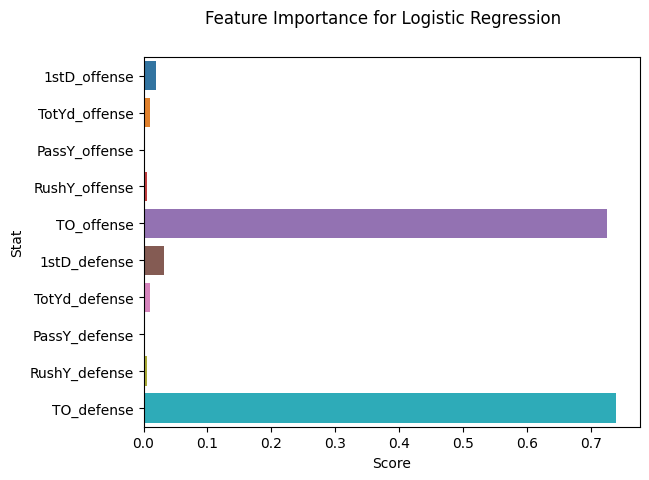

Feature:1stD_offense, Score: 0.02
Feature:TotYd_offense, Score: 0.01
Feature:PassY_offense, Score: 0.0
Feature:RushY_offense, Score: 0.01
Feature:TO_offense, Score: 0.72
Feature:1stD_defense, Score: 0.03
Feature:TotYd_defense, Score: 0.01
Feature:PassY_defense, Score: 0.0
Feature:RushY_defense, Score: 0.01
Feature:TO_defense, Score: 0.74


In [59]:
importance = abs(optLr.coef_[0])

sns.barplot(x=importance, y=features.columns)
plt.suptitle("Feature Importance for Logistic Regression")
plt.xlabel("Score")
plt.ylabel("Stat")
plt.show()

for i, v in enumerate(importance.round(2)):
    print(f"Feature:{features.columns[i]}, Score: {v}")